In [1]:
#Laod the raw data from directory
import pandas as pd
data = pd.read_csv("D:\End_to_End_MLOps on GCP\predict_loan_apporval\data\LoansTrainingSetV2.csv",low_memory=False)


In [2]:
data.drop_duplicates(subset='Loan ID', keep='first', inplace=True)

In [3]:
status = data['Loan Status'].value_counts()
print(status)

Loan Given      63737
Loan Refused    25173
Name: Loan Status, dtype: int64


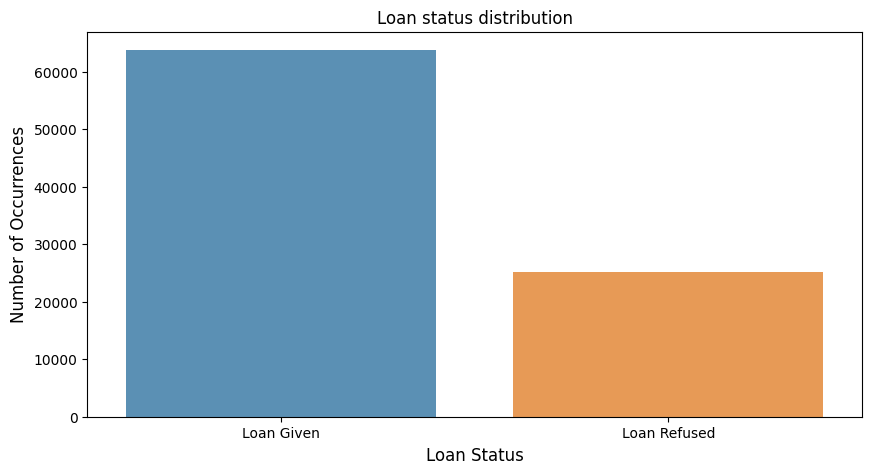

In [4]:
#lets plot our Loan Status data  
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x = status.index, y = status.values, alpha=0.8)
plt.title('Loan status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()




Our dataset is imabalanced so i will perform huge EDA Process

In [5]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
data['Current Loan Amount'].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

<Axes: ylabel='Frequency'>

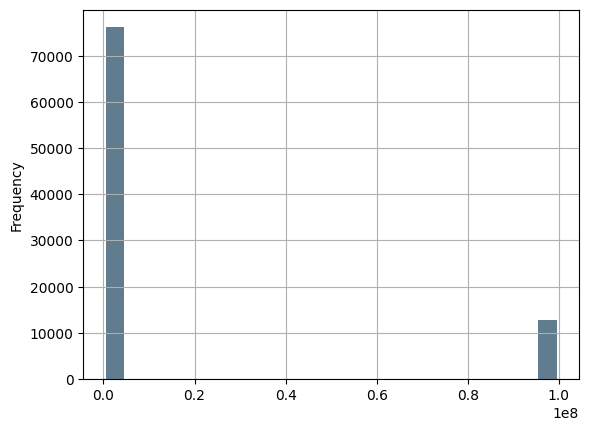

In [7]:
data['Current Loan Amount'].plot(grid=True,kind='hist', bins=20, 
                                 rwidth=0.8, color = '#607c8e')
#there are lot of outliers in our current loan amount column

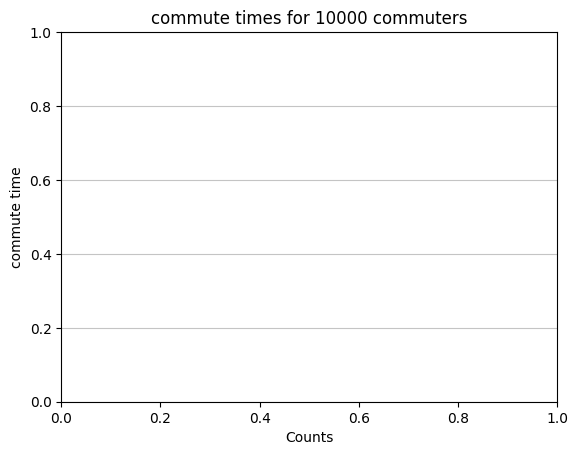

In [8]:
plt.title("commute times for 10000 commuters")
plt.xlabel("Counts")
plt.ylabel("commute time")
plt.grid(axis='y', alpha=0.75)

In [9]:
Q1 = data["Current Loan Amount"].quantile(0.25)
Q3 = data["Current Loan Amount"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

16202.0


In [10]:
#Here are the outliers in the 'Current Loan Amount' column
data[(data['Current Loan Amount'] < (Q1 - 1.5 * IQR)) | (data['Current Loan Amount'] > (Q3 + 1.5 * IQR))]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5044,bac918fa-35e0-40a2-af65-58b456a742e7,c96da120-30d2-4acd-9740-e4d280f4bfcb,Loan Given,99999999,Short Term,739.0,3 years,Home Mortgage,60012.0,Home Improvements,1295.26,16.6,33.0,16,0,427,8542,0.0,0.0
5045,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
5046,0c7fcf5e-ec4a-46d5-8175-15c846df7c74,a709e893-b6b6-49ed-b775-bdef1155c78d,Loan Given,99999999,Short Term,751.0,5 years,Rent,35693.0,Debt Consolidation,626.12,11.0,NaN,7,0,742,9166,0.0,0.0
5047,878c4189-bd53-4836-a16d-203519034758,64fa8876-80fa-4a69-b16b-144a8ecfb14a,Loan Given,99999999,Short Term,735.0,NaN,Home Mortgage,33884.0,Debt Consolidation,683.34,18.9,10.0,12,0,10835,18028,0.0,0.0
5048,193ac878-4d50-4be0-995b-20896ebc9ad8,02a4bc6d-db02-406b-9bf6-8e0dd42782eb,Loan Given,99999999,Short Term,745.0,3 years,Own Home,103343.0,Debt Consolidation,1300.41,14.1,NaN,14,0,22746,42835,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,245c4275-1d68-4593-99a5-14a1bbae3f5c,cf7f4bdb-0428-40dd-a908-76c644fe2321,Loan Given,99999999,Short Term,714.0,6 years,Rent,52052.0,Debt Consolidation,750.42,16.3,35.0,6,0,5622,5905,0.0,0.0
17778,27d1f149-fdfe-4900-b49b-cc53775a61bc,992ff133-8b9a-4d60-bfa7-8d91b2482742,Loan Given,99999999,Long Term,701.0,1 year,Home Mortgage,45604.0,Debt Consolidation,619.46,12.9,NaN,15,0,6889,10900,0.0,0.0
17779,1245eb4b-d74e-4d32-a211-1a0700e537b8,8872301a-a824-4d6f-b1a4-cb6cd5a36c57,Loan Given,99999999,Short Term,743.0,10+ years,Rent,76144.0,Debt Consolidation,666.26,18.3,94.0,11,0,12954,44062,0.0,0.0
17780,112e4c93-a77f-4e67-a52b-347153387a83,23254121-2106-4795-9dad-d8a133fe474b,Loan Given,99999999,Short Term,733.0,< 1 year,Rent,121788.0,Debt Consolidation,864.69,14.9,48.0,8,0,14916,20294,0.0,0.0


In [11]:
import numpy as np
#temp = np.array(data['Current Loan Amount'].values.tolist())
import numpy as np

# Convert 'Current Loan Amount' column to a NumPy array
temp = np.array(data['Current Loan Amount'].values.tolist())

# Ensure all elements in 'temp' are numeric. If not, handle non-numeric cases first
temp = pd.to_numeric(temp, errors='coerce')

# Replace values greater than 9999998 with 12038
data["Current Loan Amount"] = np.where(temp > 9999998, 12038, temp).tolist()


<Axes: ylabel='Frequency'>

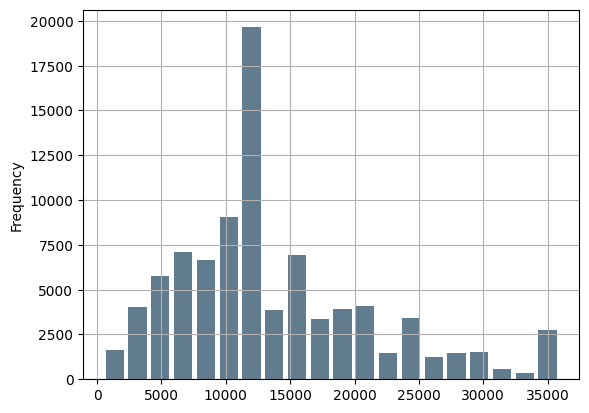

In [12]:
data['Current Loan Amount'].plot(grid=True,kind='hist', bins=20, 
                                 rwidth=0.8, color = '#607c8e')
#now all the outliers have beeen removed

In [13]:
#Now we will validate credit score columns in our dataset
data["Credit Score"].describe()

count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24a7c699670>,
 'caps': [<matplotlib.lines.Line2D at 0x24a7c6991f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a7c695a90>],
 'medians': [<matplotlib.lines.Line2D at 0x24a7c6767c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a7c6762b0>],
 'means': []}

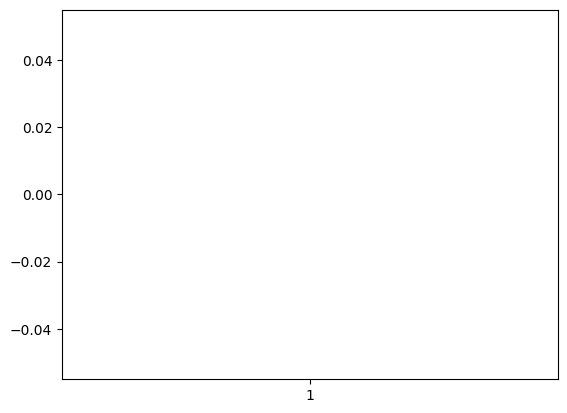

In [14]:
#lets create a box plot for this columns
plt.boxplot(data['Credit Score'])


In [15]:
data["Credit Score"].isnull().unique()

array([False,  True])

In [16]:
data['Credit Score'] = np.where(data['Credit Score'] > 800, data['Credit Score']/10, data['Credit Score'])


In [17]:
import statistics
median_score = statistics.median(data['Credit Score'])

In [18]:
data['Credit Score_1'] = data['Credit Score']
data['Credit Score_1'].fillna('median_score', inplace=True)


In [19]:
data["Credit Score"].fillna(741, inplace=True)

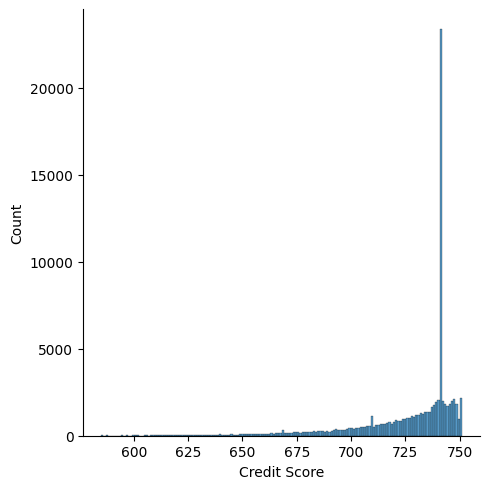

In [20]:
sns.displot(data['Credit Score'])
#we will solve the nan value problem by imputing algorithm at the last

In [21]:
#lets continue with our next column e.g Homeownership

data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score_1'],
      dtype='object')

In [22]:
data["Home Ownership"].unique()
#try to replace HomeMortgage with Home Mortagage only one similar column


array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [23]:
data["Home Ownership"] = data["Home Ownership"].str.replace('HaveMortgage', 'Home Mortgage', regex=True)
data["Home Ownership"].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

In [24]:
#there are also lot of outliers present inside Annual Income column
data["Annual Income"].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [25]:
data['Annual Income'].quantile([.2, 0.75, 0.90, .95, 0.99, .999])


0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

In [26]:
data.loc[data['Annual Income'] > 239287, "Annual Income"] = 239287

In [27]:
data['Annual Income'].isna().sum()
#so there are no null values in the Annual Income column so we will remove them at the end

21338

In [28]:
data['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [29]:
data['Purpose'] = data['Purpose'].str.replace('Other', 'other', regex=True)
#So Other and other are the same so lets make it same.

In [30]:
#So now lets explore the Monthly Debt columns and cleansed it
data['Monthly Debt'].describe()

count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

In [31]:
data['Monthly Debt'] = data['Monthly Debt'].str.replace('$', '', regex=True)


In [32]:
data['Monthly Debt'] = pd.to_numeric(data['Monthly Debt'])

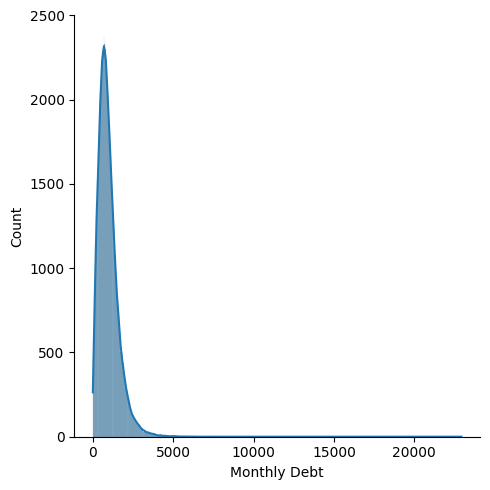

In [33]:
sns.displot(data['Monthly Debt'], kde=True)
#so there are also lot of outliers so we need to remove them

In [34]:
data['Monthly Debt'].quantile([0.999, 1])
#so there is huge difference 

0.999     4926.37475
1.000    22939.12000
Name: Monthly Debt, dtype: float64

In [35]:
data.loc[data['Monthly Debt'] > 4926, 'Monthly Debt'] = 4926

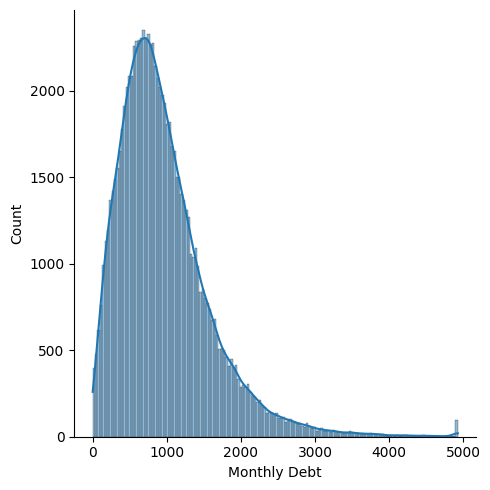

In [36]:
sns.displot(data['Monthly Debt'], kde=True)

In [37]:
#Now lets explore Numeber of open Accounts column
data.columns


Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score_1'],
      dtype='object')

In [38]:
data['Number of Open Accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

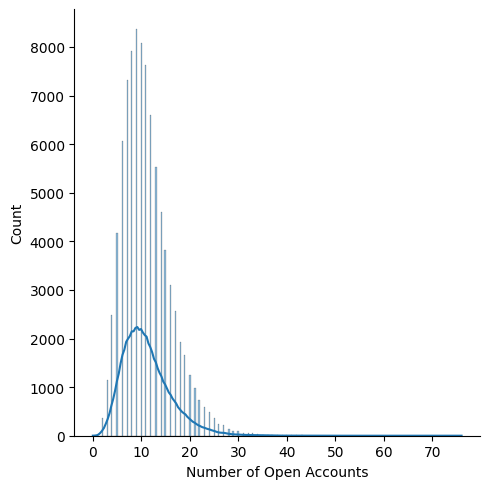

In [39]:
sns.displot(data['Number of Open Accounts'], kde=True)
#too much outliers as well ;(

In [40]:
data['Number of Open Accounts'].quantile([0.75, 0.999, 1])


0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

In [41]:
data.loc[data['Number of Open Accounts'] > 36, 'Number of Open Accounts'] = 36

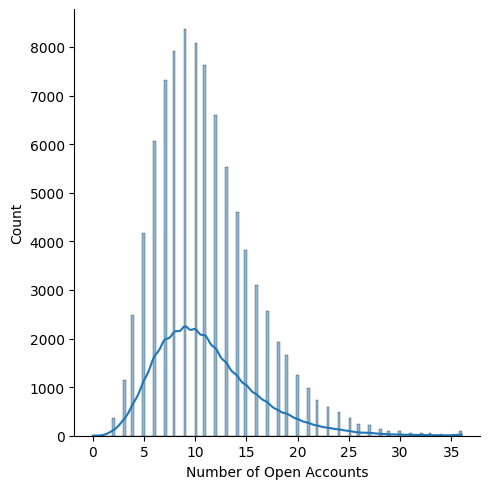

In [42]:
sns.displot(data['Number of Open Accounts'], kde=True)

In [43]:
#Now lets explore Current Credit Balance Column and try to clean it :)
data['Current Credit Balance'].value_counts()

0        513
7253      15
9262      14
5581      14
7197      12
        ... 
26694      1
29166      1
24274      1
23848      1
44728      1
Name: Current Credit Balance, Length: 33716, dtype: int64

In [44]:
data['Current Credit Balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

In [45]:
data.loc[data['Current Credit Balance'] > 81007, 'Current Credit Balance'] = 81007


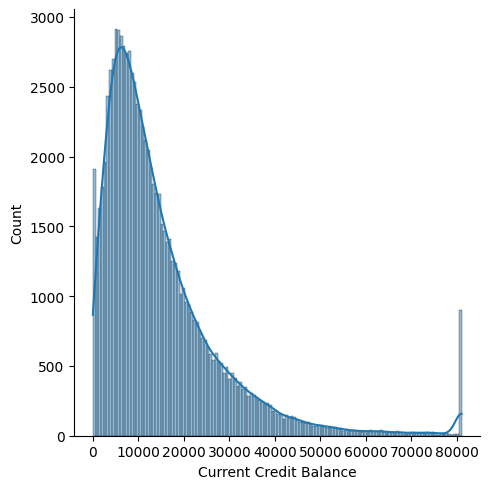

In [46]:
sns.displot(data['Current Credit Balance'], kde=True)

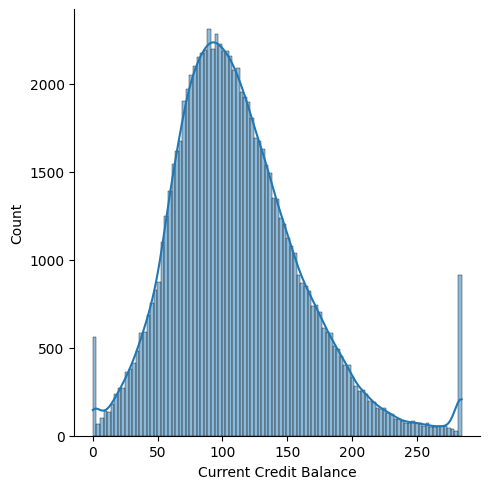

In [47]:
sns.displot(data['Current Credit Balance']**(1/2), kde=True)


In [48]:
#Now lets explore the Maximum open credit column in our data and cleansed it.

data['Maximum Open Credit'].describe()




count     88910
unique    46625
top           0
freq        610
Name: Maximum Open Credit, dtype: object

In [49]:
data['Maximum Open Credit'].value_counts()

0        610
10782     10
14382     10
17464     10
11044     10
        ... 
46635      1
25110      1
54780      1
42402      1
53374      1
Name: Maximum Open Credit, Length: 46625, dtype: int64

In [50]:
data['Maximum Open Credit'] = data['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)

In [51]:
data['Maximum Open Credit'] = pd.to_numeric(data['Maximum Open Credit'])

In [52]:
data['Maximum Open Credit'].isnull().sum()

2

In [53]:
data['Maximum Open Credit'] = data['Maximum Open Credit'].fillna(35965)

In [54]:
data['Maximum Open Credit'].quantile([0.55, 0.76, 0.87, 0.98, 0.99,1])


0.55       24037.95
0.76       37259.84
0.87       50736.66
0.98      114682.56
0.99      171423.91
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [55]:
data.loc[data['Maximum Open Credit'] > 171423, 'Maximum Open Credit'] = 171423


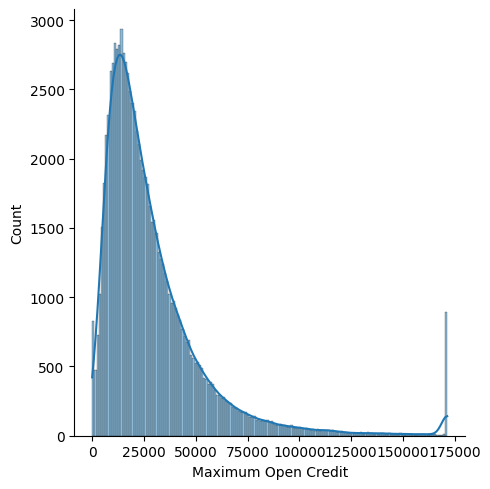

In [56]:
sns.displot(data['Maximum Open Credit'], kde=True)
#Now looks Quite Good

In [57]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score_1'],
      dtype='object')

In [58]:
#Now lets explore Bankruptcies 
data['Bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [59]:
data['Bankruptcies'] = data['Bankruptcies'].fillna(3)


In [67]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Score_1'],
      dtype='object')

In [68]:
import pandas as pd
df_final = pd.DataFrame(data)


In [70]:
df_final.to_csv('D:\End_to_End_MLOps on GCP\predict_loan_apporval\data/clean_data.csv')

In [61]:
#imputing all columns missing data with soft imputer
from fancyimpute import SoftImpute
updated_data = pd.DataFrame(data=SoftImpute().fit_transform(data[data.columns[3:19]],), columns=data[data.columns[3:19]].columns, index=data.index)

[SoftImpute] Max Singular Value of X_init = 23565302.802005
[SoftImpute] Iter 1: observed MAE=326.156686 rank=4
[SoftImpute] Iter 2: observed MAE=326.130233 rank=4
[SoftImpute] Iter 3: observed MAE=326.152253 rank=4
[SoftImpute] Iter 4: observed MAE=326.186278 rank=4
[SoftImpute] Iter 5: observed MAE=326.222607 rank=4
[SoftImpute] Iter 6: observed MAE=326.258368 rank=4
[SoftImpute] Iter 7: observed MAE=326.292603 rank=4
[SoftImpute] Iter 8: observed MAE=326.325066 rank=4
[SoftImpute] Iter 9: observed MAE=326.355801 rank=4
[SoftImpute] Iter 10: observed MAE=326.384897 rank=4
[SoftImpute] Iter 11: observed MAE=326.412279 rank=4
[SoftImpute] Iter 12: observed MAE=326.438012 rank=4
[SoftImpute] Iter 13: observed MAE=326.462226 rank=4
[SoftImpute] Iter 14: observed MAE=326.485182 rank=4
[SoftImpute] Iter 15: observed MAE=326.506584 rank=4
[SoftImpute] Iter 16: observed MAE=326.526453 rank=4
[SoftImpute] Iter 17: observed MAE=326.544799 rank=4
[SoftImpute] Iter 18: observed MAE=326.561835 ra

In [62]:
final_df = pd.get_dummies(updated_data, drop_first=True)

In [66]:
final_df.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')